In [6]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [7]:
all_df = pd.read_csv("data/titanic.csv")

In [8]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [9]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1308 train: 1033 test: 275


In [10]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [11]:
train_Features[355:359]

array([[0.5       , 1.        , 0.48532708, 0.02513033],
       [0.5       , 1.        , 0.82392769, 0.02410559],
       [0.5       , 1.        , 0.67494342, 0.05074862],
       [0.5       , 0.        , 0.56659123, 0.05074862]])

In [12]:
train_Label[:4]

array([1., 1., 0., 0.])

In [13]:
test_Features.shape

(275, 4)

In [14]:
test_Label.shape

(275,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.


In [16]:
train_Features.shape

(1033, 4)

In [17]:
train_Features = train_Features.reshape(train_Features.shape[0], 2, 2, 1)

In [18]:
train_Features.shape

(1033, 2, 2, 1)

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(2,2,1), 
                 activation='relu'))

In [21]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(128, activation='tanh'))

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 1000)        2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 1000)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512128    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [29]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1033/1033 [==============================] - 23s 22ms/step - loss: 0.1822 - acc: 0.7580


In [30]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=120,verbose=1)

Train on 826 samples, validate on 207 samples
Epoch 1/10
826/826 [==============================] - 7s 9ms/step - loss: 0.1675 - acc: 0.7627 - val_loss: 0.1514 - val_acc: 0.7826
Epoch 2/10
826/826 [==============================] - 8s 9ms/step - loss: 0.1594 - acc: 0.7724 - val_loss: 0.1560 - val_acc: 0.7536
Epoch 3/10
826/826 [==============================] - 7s 9ms/step - loss: 0.1570 - acc: 0.7833 - val_loss: 0.1509 - val_acc: 0.7778
Epoch 4/10
826/826 [==============================] - 8s 9ms/step - loss: 0.1552 - acc: 0.7869 - val_loss: 0.1504 - val_acc: 0.7778
Epoch 5/10
826/826 [==============================] - 8s 10ms/step - loss: 0.1610 - acc: 0.7833 - val_loss: 0.1898 - val_acc: 0.7536
Epoch 6/10
826/826 [==============================] - 7s 9ms/step - loss: 0.1646 - acc: 0.7663 - val_loss: 0.1531 - val_acc: 0.8068
Epoch 7/10
826/826 [==============================] - 7s 8ms/step - loss: 0.1516 - acc: 0.7930 - val_loss: 0.1510 - val_acc: 0.7826
Epoch 8/10
826/826 [=========

In [31]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

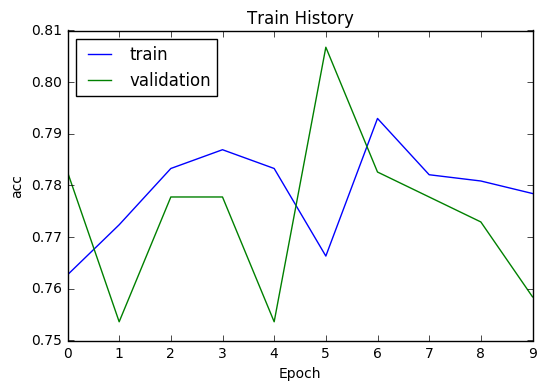

In [32]:
show_train_history(train_history,'acc','val_acc')

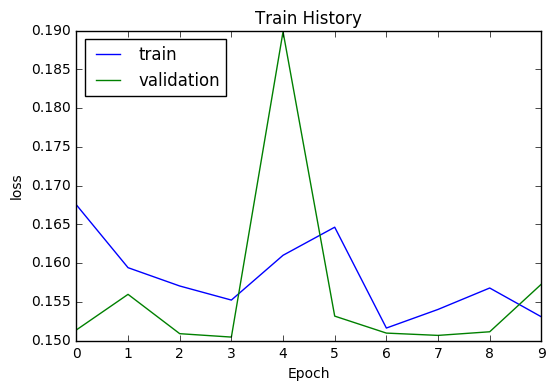

In [33]:
show_train_history(train_history,'loss','val_loss')

In [34]:
test_Features = test_Features.reshape(test_Features.shape[0], 2, 2, 1)

In [35]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 1ms/step


In [36]:
scores[1]

0.7963636367971247